In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 16.0 MB/s 


In [3]:
#NLP packages
import neattext.functions as nfx

In [4]:
#ML Package
from sklearn.ensemble import RandomForestClassifier

#Transformers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Emotion Detection/emotion_dataset_raw.csv')

In [6]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [7]:
#value count 
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

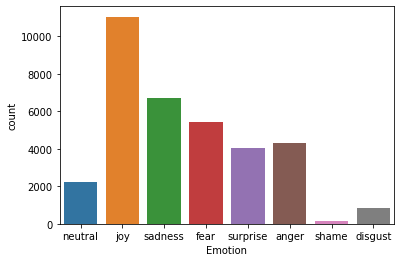

In [8]:
sns.countplot(x='Emotion',data=df)

In [9]:
df.shape

(34792, 2)

In [10]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


DATA Cleaning

In [12]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [13]:
df['Clean_text'] = df['Text'].apply(nfx.remove_userhandles)

In [14]:
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_stopwords)


In [15]:
df

,Emotion,Text,Clean_text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [16]:
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_special_characters)


In [17]:
df.head()

,Emotion,Text,Clean_text
0,neutral,Why ?,
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e b...


In [18]:
X = df['Clean_text']
y = df['Emotion']

In [19]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#y = le.fit_transform(y)

In [20]:
#Split data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [21]:
from sklearn.pipeline import Pipeline

In [22]:
pipe_lr = Pipeline(steps=[('tf',TfidfVectorizer()),('rf',RandomForestClassifier())])

In [23]:
# Train and Fit Data
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('tf', TfidfVectorizer()), ('rf', RandomForestClassifier())])

In [24]:
pipe_lr.score(X_test,y_test)

0.6223595344158643

In [25]:
ex1 = "This is so gone"

pipe_lr.predict([ex1])

array(['sadness'], dtype=object)

In [25]:
import bz2
import pickle

In [33]:
ofile = bz2.BZ2File("model1.pkl",'wb')
pickle.dump(pipe_lr,ofile)
ofile.close()

In [35]:
ifile = bz2.BZ2File("model1.pkl",'rb')
newdata = pickle.load(ifile)

In [36]:
#pickled_model = pickle.load(open('model1.pkl', 'rb'))
newdata.predict(['I love you'])

array(['joy'], dtype=object)